In [34]:
import pandas as pd
import numpy as np

In [35]:
file_path = 'CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a_cycle_data.csv'

In [36]:
data = pd.read_csv(file_path)

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cycle_Index              2016 non-null   float64
 1   Start_Time               0 non-null      float64
 2   End_Time                 0 non-null      float64
 3   Test_Time (s)            2016 non-null   float64
 4   Min_Current (A)          2016 non-null   float64
 5   Max_Current (A)          2016 non-null   float64
 6   Min_Voltage (V)          2016 non-null   float64
 7   Max_Voltage (V)          2016 non-null   float64
 8   Charge_Capacity (Ah)     2016 non-null   float64
 9   Discharge_Capacity (Ah)  2016 non-null   float64
 10  Charge_Energy (Wh)       2016 non-null   float64
 11  Discharge_Energy (Wh)    2016 non-null   float64
dtypes: float64(12)
memory usage: 189.1 KB


In [38]:
data.describe()

,Cycle_Index,Start_Time,End_Time,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh)
count,2016.000000,0.0,0.0,2.016000e+03,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,1008.500000,NaN,NaN,1.649939e+07,-0.603189,1.227115,2.703217,4.199373,1.061041,1.069140,4.264741,3.931576
std,582.113391,NaN,NaN,9.229917e+06,0.072588,0.123001,0.046085,0.022456,0.152924,0.295563,0.600193,1.193093
min,1.000000,NaN,NaN,1.090767e+04,-0.675000,0.000000,2.699000,3.221000,0.000000,0.000000,0.000000,0.000000
25%,504.750000,NaN,NaN,8.542973e+06,-0.675000,1.207000,2.699000,4.200000,0.973000,0.973000,3.923000,3.527750
50%,1008.500000,NaN,NaN,1.677921e+07,-0.550000,1.244500,2.699000,4.200000,1.058000,1.060000,4.254500,3.906500
75%,1512.250000,NaN,NaN,2.459101e+07,-0.550000,1.268250,2.699000,4.200000,1.183000,1.185000,4.742000,4.405000
max,2016.000000,NaN,NaN,3.172761e+07,0.000000,3.879000,3.315000,4.216000,1.470000,12.497000,5.919000,50.322000


In [39]:
data.isnull().sum()

Cycle_Index                   0
Start_Time                 2016
End_Time                   2016
Test_Time (s)                 0
Min_Current (A)               0
Max_Current (A)               0
Min_Voltage (V)               0
Max_Voltage (V)               0
Charge_Capacity (Ah)          0
Discharge_Capacity (Ah)       0
Charge_Energy (Wh)            0
Discharge_Energy (Wh)         0
dtype: int64

In [40]:
data = data.drop(columns=['Start_Time', 'End_Time'])

In [41]:
print(data.isnull().sum())

Cycle_Index                0
Test_Time (s)              0
Min_Current (A)            0
Max_Current (A)            0
Min_Voltage (V)            0
Max_Voltage (V)            0
Charge_Capacity (Ah)       0
Discharge_Capacity (Ah)    0
Charge_Energy (Wh)         0
Discharge_Energy (Wh)      0
dtype: int64


In [43]:
data.head()

,Cycle_Index,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh)
0,1.0,10907.674,-0.550,0.905,2.699,4.201,0.108,1.268,0.455,4.717
1,2.0,28594.592,-0.550,1.275,2.699,4.200,1.268,1.269,5.073,4.725
2,3.0,46275.123,-0.551,1.293,2.699,4.200,1.268,1.269,5.071,4.730
3,4.0,63919.436,-0.551,1.273,2.699,4.200,1.269,1.269,5.076,4.727
4,5.0,81579.524,-0.550,1.281,2.699,4.212,1.268,1.268,5.072,4.724


In [45]:
# Calculate capacity fade as the difference between the initial capacity and current capacity
initial_capacity = data['Charge_Capacity (Ah)'].iloc[0]
data['Capacity_Fade'] = initial_capacity - data['Discharge_Capacity (Ah)']

# Calculate energy efficiency as the ratio of discharge energy to charge energy
data['Energy_Efficiency'] = data['Discharge_Energy (Wh)'] / data['Charge_Energy (Wh)']

# Calculate average voltage during charge and discharge cycles
data['Average_Charge_Voltage'] = data['Charge_Energy (Wh)'] / data['Charge_Capacity (Ah)']
data['Average_Discharge_Voltage'] = data['Discharge_Energy (Wh)'] / data['Discharge_Capacity (Ah)']

# Create target variable for RUL (assuming the data is ordered by cycle index)
data['RUL'] = data['Cycle_Index'].max() - data['Cycle_Index']

# Drop rows with infinite or NaN values resulting from calculations
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
data.dropna(inplace=True)

# Display the first few rows with new features
data.head()


,Cycle_Index,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Capacity_Fade,Energy_Efficiency,Average_Charge_Voltage,Average_Discharge_Voltage,RUL
0,1.0,10907.674,-0.550,0.905,2.699,4.201,0.108,1.268,0.455,4.717,-1.160,10.367033,4.212963,3.720032,2015.0
1,2.0,28594.592,-0.550,1.275,2.699,4.200,1.268,1.269,5.073,4.725,-1.161,0.931402,4.000789,3.723404,2014.0
2,3.0,46275.123,-0.551,1.293,2.699,4.200,1.268,1.269,5.071,4.730,-1.161,0.932755,3.999211,3.727344,2013.0
3,4.0,63919.436,-0.551,1.273,2.699,4.200,1.269,1.269,5.076,4.727,-1.161,0.931245,4.000000,3.724980,2012.0
4,5.0,81579.524,-0.550,1.281,2.699,4.212,1.268,1.268,5.072,4.724,-1.160,0.931388,4.000000,3.725552,2011.0


In [46]:
from sklearn.preprocessing import StandardScaler

# Features to be used for training
features = ['Test_Time (s)', 'Min_Current (A)', 'Max_Current (A)', 'Min_Voltage (V)', 'Max_Voltage (V)',
            'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)', 'Charge_Energy (Wh)', 'Discharge_Energy (Wh)',
            'Capacity_Fade', 'Energy_Efficiency', 'Average_Charge_Voltage', 'Average_Discharge_Voltage']

# Target variable
target = 'RUL'

# Standardizing the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Display the first few rows of the normalized dataset
data.head()


,Cycle_Index,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Capacity_Fade,Energy_Efficiency,Average_Charge_Voltage,Average_Discharge_Voltage,RUL
0,1.0,-1.787917,0.898057,-3.123584,-0.066529,0.957422,-6.375547,0.675104,-6.504305,0.658467,-0.675104,5.186487,6.889181,0.861335,2015.0
1,2.0,-1.786002,0.898057,0.465922,-0.066529,0.012238,1.374773,0.678573,1.369766,0.665310,-0.678573,-0.040338,-0.790694,0.919209,2014.0
2,3.0,-1.784087,0.881903,0.640546,-0.066529,0.012238,1.374773,0.678573,1.366356,0.669587,-0.678573,-0.039588,-0.847786,0.986820,2013.0
3,4.0,-1.782176,0.881903,0.446519,-0.066529,0.012238,1.381454,0.678573,1.374882,0.667021,-0.678573,-0.040424,-0.819240,0.946254,2012.0
4,5.0,-1.780264,0.898057,0.524130,-0.066529,11.354443,1.374773,0.675104,1.368061,0.664455,-0.675104,-0.040345,-0.819240,0.956065,2011.0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Splitting the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
lr = LinearRegression()
svr = SVR()

# Training the models
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)


SVR()

Linear Regression MSE: 261.0527840221254
SVR MSE: 116769.36650480234


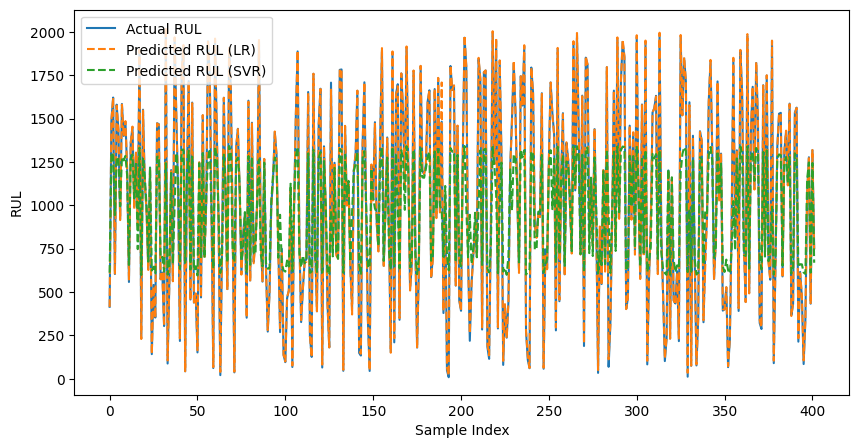

In [48]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Making predictions
lr_predictions = lr.predict(X_test)
svr_predictions = svr.predict(X_test)

# Evaluating the models
lr_mse = mean_squared_error(y_test, lr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print(f'Linear Regression MSE: {lr_mse}')
print(f'SVR MSE: {svr_mse}')

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual RUL')
plt.plot(lr_predictions, label='Predicted RUL (LR)', linestyle='--')
plt.plot(svr_predictions, label='Predicted RUL (SVR)', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()
